# TOPIC BASED SENTIMENT ANALYSIS

### TOPIC ANALYSIS

<i>Topic Analysis</i> is a statistical technique that is used to identify, extract and analyse the topics covered by a text. In the multitude of documents available today, this technique plays a fundamental role in drastically reducing the time needed to understand the content. For example, supposing we have to work with a large database of reviews, TopicAnalysis makes it possible to automatically identify, in a relatively short time, the most discussed topics, on which we can then develop various other analyses according to our objectives.

In this case, because there is no a priori knowledge of the topics discussed by the texts, I need to use an unsupervised approach: the `Latent Dirichlet Allocation`, known even as LDA.
<br>The LDA model is based on two principal assumptions:
- Each document is made up of a mix of topics, present within the text in different proportions. For example, in a simplified model with two topics, it could be said that document 1 is made up of 90% of Topic A and 10% of Topic B, while document 2 is made up of 30% of Topic A and 70% of Topic B. 
- Each topic is characterised by a set of words, with the latter having different probabilities of belonging to one topic rather than another. For example, taking a model with topics "Politics" and "Entertainment", the most common words for the first topic might be "minister", "government", "president"; while the most frequent words associated with the second might be "film", "television", "actor". 

In summary, LDA is a method of analysis that performs two actions simultaneously: on the one hand, it tries to identify the set of words within the vocabulary that are most likely to lead back to a specific topic; on the other hand, it tries to determine which mix of topics best characterises each document. In this way, each word belongs to any topic with a certain probability, similarly to how each topic is present in each document with different probabilities.

The function to fit a LDA model requires a Document-Term Matrix, that is the transposed of the TDM. Furthermore, it has to be a sparse matrix object.

In [2]:
library(repr)

options(repr.plot.width=15, repr.plot.height=7)

In [83]:
library(readxl)
library(tidyverse)
library(scales)
library(tm)
library(textmineR)
library(Matrix)
library(ramify)
library(vader)

In [60]:
#df1 is the dataset with the text and the brands
df1 <- readRDS("df1.rds")

In [3]:
reviewtext <- readRDS("corpus.rds")

In [40]:
dtm <- DocumentTermMatrix(reviewtext)

In [5]:
dtm <- removeSparseTerms(dtm, sparse = 0.99)
d <- as.matrix(dtm)

In [6]:
d <- Matrix(d, sparse = TRUE)

#### OPTIMAL NUMBER OF TOPIC

In order to define the <b>optimal number of topic</b>, which is not known at priori, I will use the `coherence` metric, which measures the semantic similarity of the words that most distinguish each topic, and then obtain an aggregate measure based on the arithmetic mean of the scores associated for the individual topics.

In [7]:
k_list <- seq(2,15,1)

In [8]:
set.seed(1)
k_list <- seq(2,15,1)
i<-1
result<-c()
while (i < 15) {
  k <- k_list[i]
  model <- FitLdaModel(dtm = d, k = k, iterations = 500)
  c <- mean(model$coherence)
  result <- c(result, c)
  i = i+1
}

In [9]:
res <- as.data.frame(result)

In [10]:
res$topic_n <- seq(2,15,1)

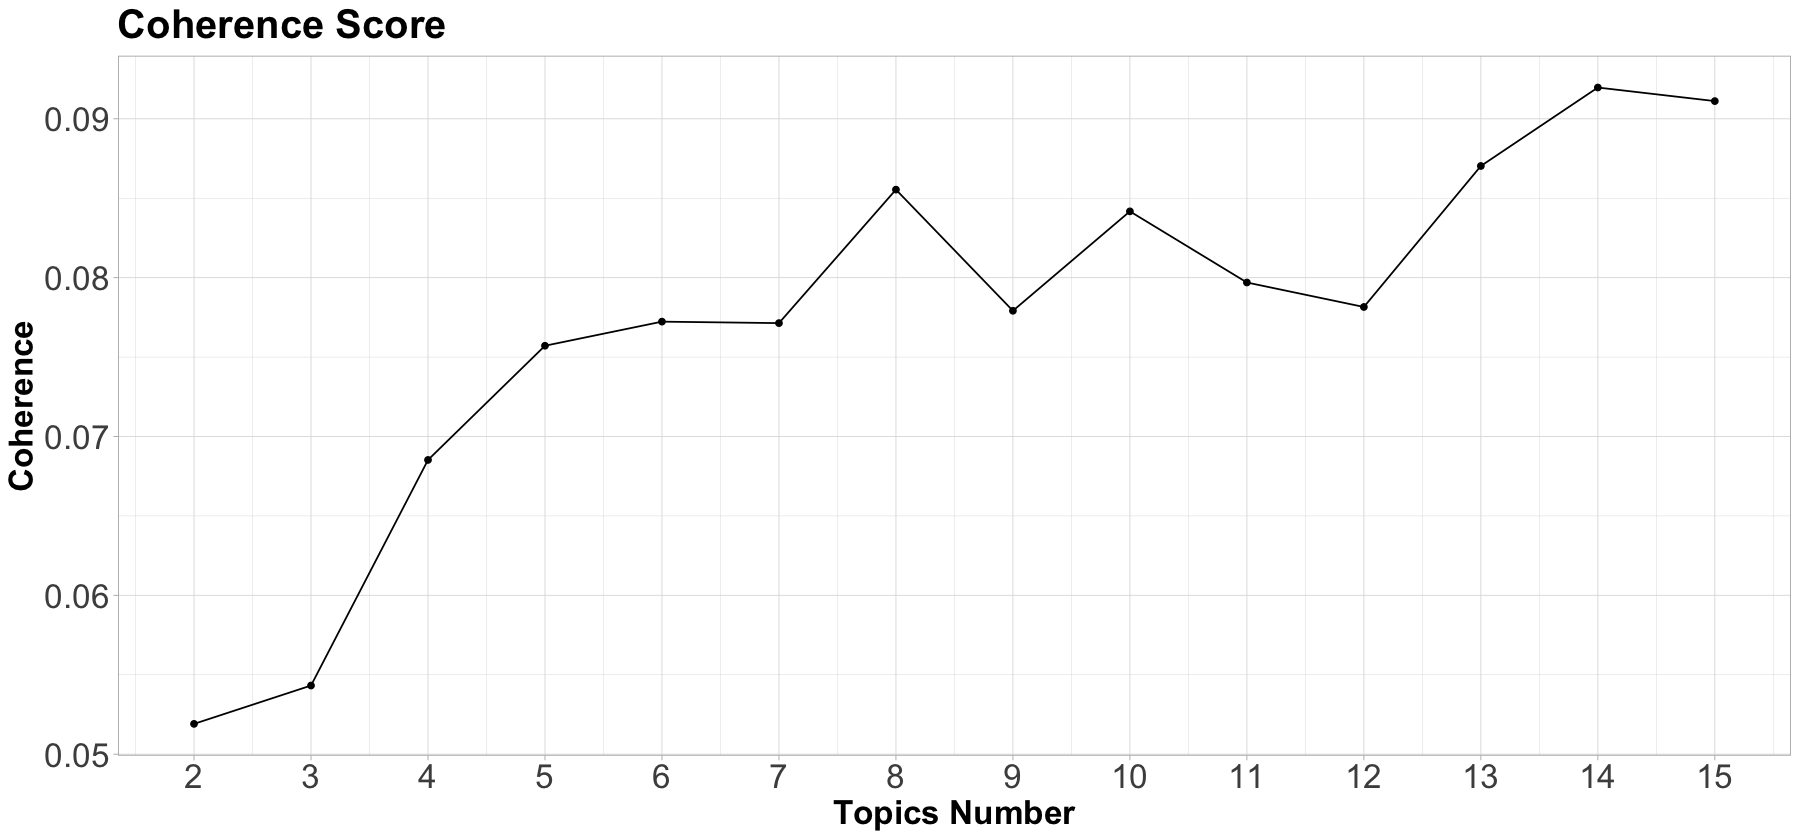

In [11]:
ggplot(res, aes(x = topic_n, y = result))+
  geom_point()+
  geom_line()+
  theme_light()+
  xlab("Topics Number") + ylab("Coherence")+
  ggtitle("Coherence Score")+
  theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"), 
  plot.title = element_text(size = 24, face="bold"))+
  scale_x_continuous(n.breaks = 14)

Based on the result obtained, i choose 8 as the optimal number of topics. This is because, although the coherence increases with a greater number of topics, I need to find the right compromise in order to have topics that are representative of the text and interpretable by myself.

<i>Note that, in reality, more solutions or metrics have to be explored and compared, in order to find the best model. For the purpose of my analysis, i will analyse only the model with 8 topics.</i>

#### FINAL MODEL AND TOPIC INTERPRETATION

In [12]:
set.seed(1)
final_model <- FitLdaModel (dtm = d, k = 8, iterations = 500)

Get 50 most important words for each topic

In [22]:
final_model$top_terms <- GetTopTerms(phi = final_model$phi, M = 100, return_matrix = FALSE)
top50_wide <- as.data.frame(final_model$top_terms)

In [28]:
final_model$top_terms[1:50,]

t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
phone,phone,phone,phone,phone,phone,phone,phone
work,call,batteri,new,work,good,great,screen
month,work,life,came,sim,great,work,use
charg,use,great,scratch,card,price,love,camera
buy,get,use,like,unlock,qualiti,good,like
screen,updat,day,charger,verizon,best,perfect,fingerprint
back,issu,last,screen,att,camera,new,can
will,app,charg,look,use,love,like,get
return,one,good,good,tmobil,valu,product,great


From here, we can get that:
- Topic 1 is about the customer service offered by Amazon
- Topic 2 is about the functionality of the phone
- Topic 3 is about the battery
- Topic 4 and Topic 7 are about the spedition
- Topic 5 is about the phone operator
- Topic 6 is about the price
- Topic 8 is about the camera

Given that there doesn't seem to be a huge difference between topic 4 and 7, at the end we have 7 topics.

#### TOPIC DISTRIBUTION

Understand the topic distribution by classifying each document in the respective dominant topic

In [33]:
dominant_topic <- argmax(final_model$theta)

Dataframe where I have text and dominant topic for each review.

In [61]:
df1 <- cbind(df1, dominant_topic)
head(df1)

,titlebody,title.x,body,brand,dominant_topic
,<chr>,<chr>,<chr>,<chr>,<int>
24,Supply are needed. The phone did not come with a charger and didn't have a sims card.,Supply are needed,The phone did not come with a charger and didn't have a sims card.,Motorola,5
128,"Sound Quality: Impressive, Battery Life: Out Of This World.. I made a three hour international call and it didn't even bring the battery meter have a bar. WOW, I am so impressed on the long battery life. The sound quality compares to my Infinity Accoustics Kappa Audiophile studio speakers. No need to raise the volume. I had ordered this flip phone to compliment my Moto Droid Touch IV Mini as a backup phone. I have found my new main phone. $35.00 for this product is a steal. it should be worth more.","Sound Quality: Impressive, Battery Life: Out Of This World.","I made a three hour international call and it didn't even bring the battery meter have a bar. WOW, I am so impressed on the long battery life. The sound quality compares to my Infinity Accoustics Kappa Audiophile studio speakers. No need to raise the volume. I had ordered this flip phone to compliment my Moto Droid Touch IV Mini as a backup phone. I have found my new main phone. $35.00 for this product is a steal. it should be worth more.",Motorola,3
129,"Dont waste your money on this junk!. Horrible purchase. Came today and first thing I noticed is it is far from ""like new"". Looks like my 5 yr old has been playing with it a few yrs. Avoid at all costs. I guess its cheap for a reason. Dont waste your money",Dont waste your money on this junk!,"Horrible purchase. Came today and first thing I noticed is it is far from ""like new"". Looks like my 5 yr old has been playing with it a few yrs. Avoid at all costs. I guess its cheap for a reason. Dont waste your money",Motorola,1
135,Very tiny phone. Defiantly much smaller then raiser I remember.,Very tiny phone,Defiantly much smaller then raiser I remember.,Motorola,1
140,the battery life is bad. the cell phone is broken,the battery life is bad,the cell phone is broken,Motorola,6
142,":/. Nice phone, suck company.",:/,"Nice phone, suck company.",Motorola,2


In [69]:
#NOMENCLATURA TOPIC SULLA BASE DEI TERMINI PIù FREQUENTI
df1$dominant_topic <- ifelse(df1$dominant_topic == "1", "Customer Service", ifelse(
  df1$dominant_topic == "2", "Functionality", ifelse(
    df1$dominant_topic == "3", "Battery", ifelse(
      df1$dominant_topic == "4", "Spedition", ifelse(
        df1$dominant_topic == "5", "Operator", ifelse(
          df1$dominant_topic == "6", "Price", ifelse(
            df1$dominant_topic == "7", "Spedition", "Camera"
          )
        )
      )
    ))
) )

In [80]:
n_topic <- as.data.frame(df1) %>%
  group_by(dominant_topic) %>%
  summarise(cnt = n()) %>%
  mutate(freq = round(cnt / sum(cnt), 4)) %>% 
  arrange(desc(freq))
n_topic

dominant_topic,cnt,freq
<chr>,<int>,<dbl>
Spedition,7265,0.2738
Price,4203,0.1584
Camera,3368,0.1269
Battery,3280,0.1236
Customer Service,3239,0.1221
Functionality,2639,0.0995
Operator,2539,0.0957


Rename topics and visualize the distribution.

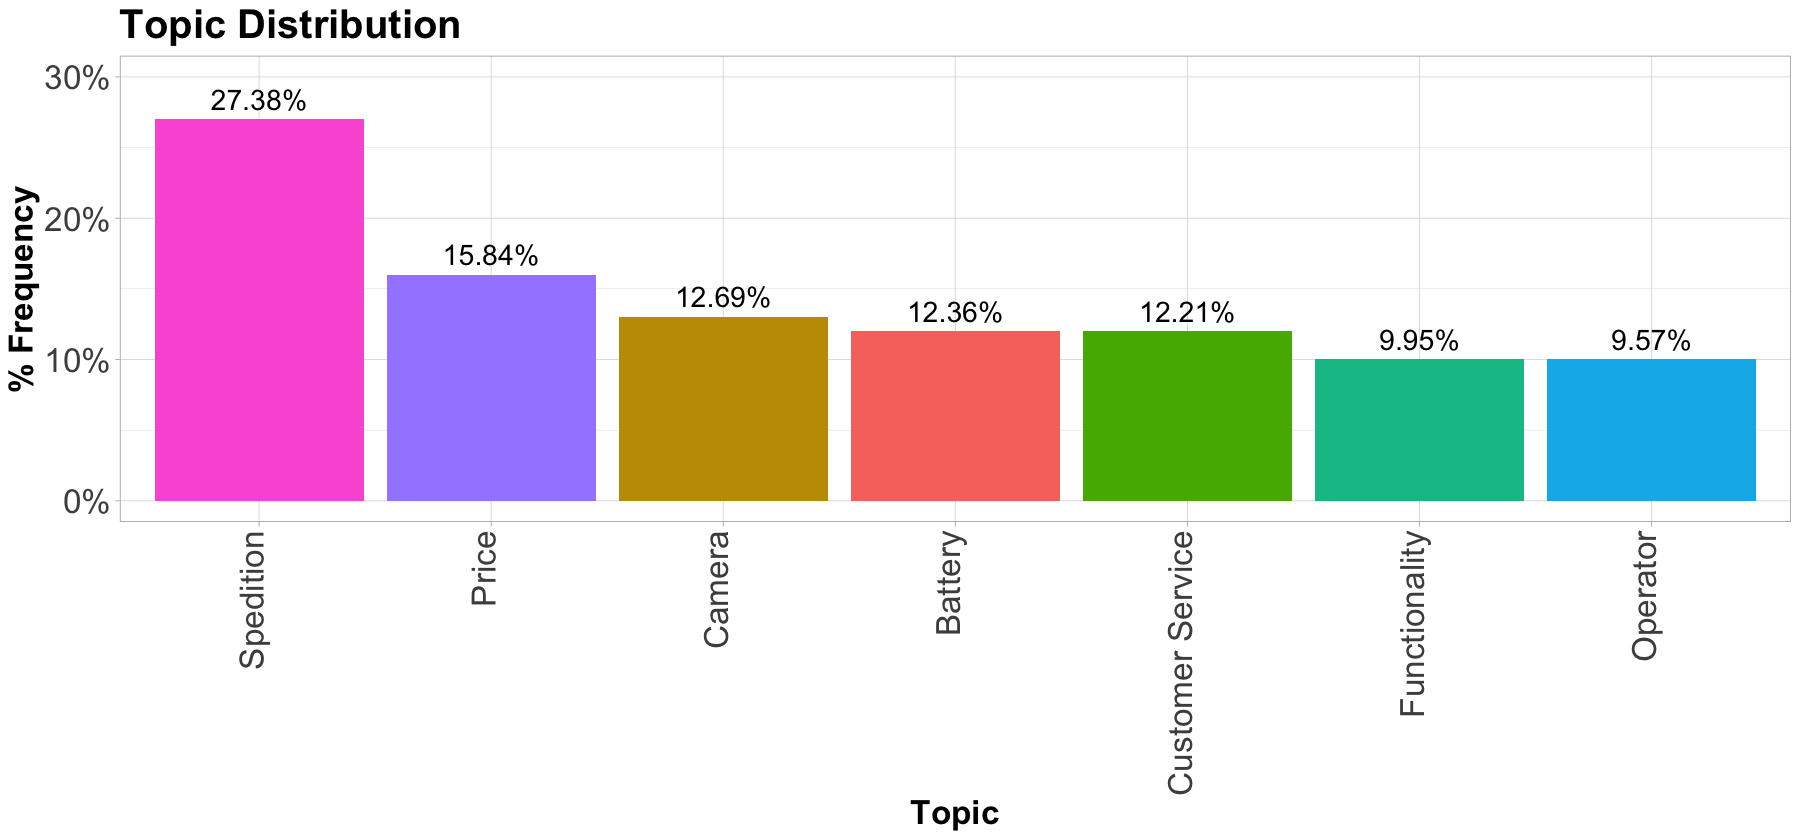

In [79]:
ggplot(n_topic, aes(x = reorder(dominant_topic, -freq), 
              y = round(freq,2), fill = dominant_topic,
              label = scales::percent(freq, accuracy = 0.01))) +
  geom_bar(stat = "identity")+
  theme_light()+
  geom_text(position = position_dodge(width = .9), vjust = -0.5, size = 6) +
  scale_y_continuous(labels = scales::percent, limits = c(0,0.3))+
  xlab("Topic")+ ylab("% Frequency")+
  ggtitle("Topic Distribution")+
  theme(legend.position = 'none', axis.text.x = element_text(angle = 90, vjust = 0.2, hjust=1), 
  axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"), 
  plot.title = element_text(size = 24, face="bold"))

As can be seen, more than a third of the reviews focus on the service offered by Amazon, with shipping and customer service being discussed in 27.38% and 12.21% of the cases respectively. In contrast, the least discussed topics are the functionalities and the operator, which are associated with just over 9.50% of the texts. Evaluated from an absolute point of view, however, these topics are present in at least 2,500 reviews.

## SENTIMENT ANALYSIS

<i>Sentiment Analysis</i> is the research field of textual analysis that deals with studying people's opinions, evaluations, attitudes and emotions towards entities such as products, services, organisations, topics, individuals and so on.

One possible approach is the lexicon one: the need to associate positive or negative valence to the words that make up a text is resolved by creating a vocabulary in which each term is labelled with its respective polarity.

In this case, I used the dictionary VADER, an acronym for Valence Aware Dictionary and Sentiment Reasoner. VADER is a polarised lexicon developed specifically for sentiment analysis of social media texts and reviews, but also applicable in other domains. It currently contains more than 20,000 English words (for more info check https://github.com/cjhutto/vaderSentiment).

The methodology used by VADER is as follows: each word of the text is associated with a rating on a scale ranging from -4 (extremely negative) to +4 (extremely positive), where 0 indicates neutral sentiment. However, since the rating may vary depending on an individual's perception of the word in question, the scores are obtained as an average of the ratings given by groups of online users.
<br> Then, the sentiment of the sentence and/or document is calculated by summing up the average scores of all the terms and then normalising the final result, known as the compound, to be within the range [-1,+1], where the extremes are associated with extremely negative and extremely positive sentiment, respectively. 
<br>Based on the described methodology, one of the most commonly used classifications for documents is as follows:
- positive sentiment if <i>compound > 0.05</i>;
- neutral sentiment if <i>-0.05 < compound < 0.05</i>;
- negative sentiment if <i>compound < -0.05</i>;

In [84]:
s_vader <- vader_df(df1[,1])

Warning message in sentiments[i] <- senti_valence(wpe, i, item):
“il numero di elementi da sostituire non è un multiplo della lunghezza di sostituzione”
Warning message in sentiments[i] <- senti_valence(wpe, i, item):
“il numero di elementi da sostituire non è un multiplo della lunghezza di sostituzione”
Warning message in vader_df(df1[, 1]):
“1 row contains an error. Filter word_scores for 'ERROR' to identify the problematic text.”


In [86]:
valence <- s_vader$compound

In [87]:
s_polarity <- ifelse(valence < -0.05, "negative", 
                     ifelse(valence > 0.05, "positive", "neutral"))

In [88]:
df2 <- cbind(df1, valence, s_polarity)

In [89]:
head(df2)

,titlebody,title.x,body,brand,dominant_topic,valence,s_polarity
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
24,Supply are needed. The phone did not come with a charger and didn't have a sims card.,Supply are needed,The phone did not come with a charger and didn't have a sims card.,Motorola,Operator,0.000,neutral
128,"Sound Quality: Impressive, Battery Life: Out Of This World.. I made a three hour international call and it didn't even bring the battery meter have a bar. WOW, I am so impressed on the long battery life. The sound quality compares to my Infinity Accoustics Kappa Audiophile studio speakers. No need to raise the volume. I had ordered this flip phone to compliment my Moto Droid Touch IV Mini as a backup phone. I have found my new main phone. $35.00 for this product is a steal. it should be worth more.","Sound Quality: Impressive, Battery Life: Out Of This World.","I made a three hour international call and it didn't even bring the battery meter have a bar. WOW, I am so impressed on the long battery life. The sound quality compares to my Infinity Accoustics Kappa Audiophile studio speakers. No need to raise the volume. I had ordered this flip phone to compliment my Moto Droid Touch IV Mini as a backup phone. I have found my new main phone. $35.00 for this product is a steal. it should be worth more.",Motorola,Battery,0.896,positive
129,"Dont waste your money on this junk!. Horrible purchase. Came today and first thing I noticed is it is far from ""like new"". Looks like my 5 yr old has been playing with it a few yrs. Avoid at all costs. I guess its cheap for a reason. Dont waste your money",Dont waste your money on this junk!,"Horrible purchase. Came today and first thing I noticed is it is far from ""like new"". Looks like my 5 yr old has been playing with it a few yrs. Avoid at all costs. I guess its cheap for a reason. Dont waste your money",Motorola,Customer Service,0.619,positive
135,Very tiny phone. Defiantly much smaller then raiser I remember.,Very tiny phone,Defiantly much smaller then raiser I remember.,Motorola,Customer Service,0.000,neutral
140,the battery life is bad. the cell phone is broken,the battery life is bad,the cell phone is broken,Motorola,Price,-0.765,negative
142,":/. Nice phone, suck company.",:/,"Nice phone, suck company.",Motorola,Functionality,-0.026,neutral


In [120]:
sentiment <-df2 %>%
  group_by(dominant_topic, s_polarity) %>%
  summarise(cnt = n()) %>%
  mutate(freq = (round(cnt / sum(cnt), 4))) %>% 
  arrange(desc(freq))

`summarise()` has grouped output by 'dominant_topic'. You can override using
the `.groups` argument.


In [123]:
sentiment

dominant_topic,s_polarity,cnt,freq
<chr>,<chr>,<int>,<dbl>
Price,positive,4034,0.9598
Spedition,positive,6359,0.8753
Camera,positive,2868,0.8515
Battery,positive,2651,0.8082
Functionality,positive,1603,0.6074
Operator,positive,1386,0.5459
Customer Service,negative,1627,0.5023
Customer Service,positive,1290,0.3983
Functionality,negative,862,0.3266


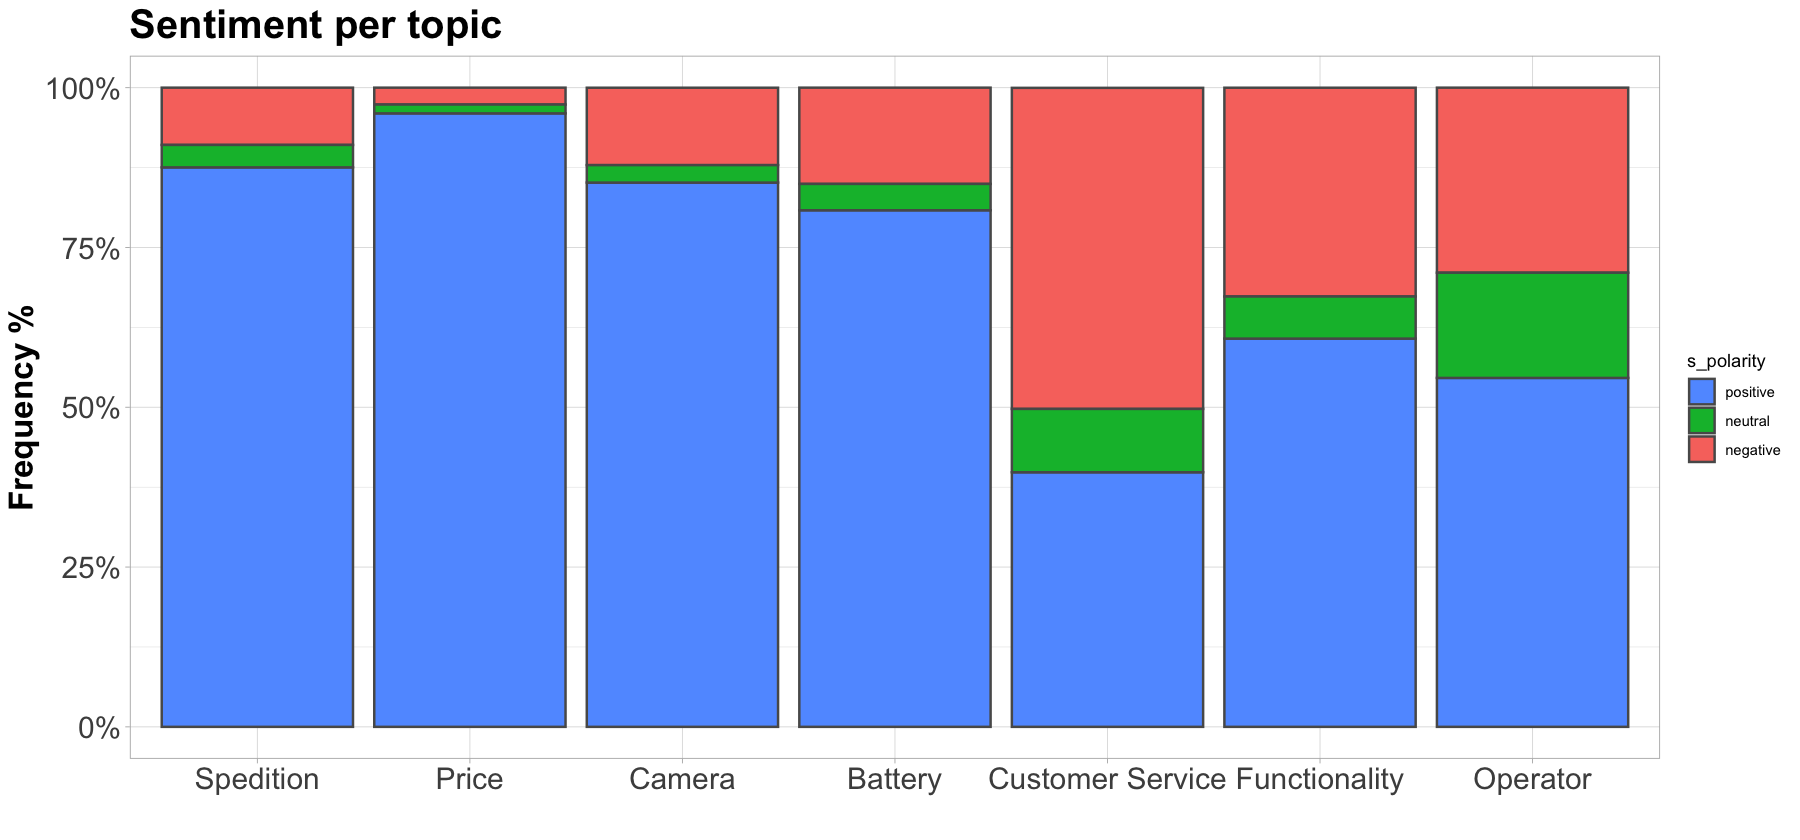

In [127]:
ggplot(data= sentiment[1:21,],aes(x = reorder(dominant_topic, -cnt), y = freq, fill = s_polarity))+
  geom_bar(stat="identity",color="gray35", size=0.7)+ 
  #scale_fill_manual(values=brewer.pal(3,"Spectral"), name = "Sentiment")+
  theme_light()+
  xlab("")+
  ylab("Frequency %")+
  #coord_flip()+
  ggtitle("Sentiment per topic")+
  scale_y_continuous(labels = percent)+
  guides(fill = guide_legend(reverse = TRUE))+
  theme(axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold"), 
  plot.title = element_text(size = 24, face="bold"))

As for the sentiment associated with the nine topics, this is assessed by comparing the proportion of positive, neutral and negative reviews.

First of all, it can be seen that, for 6 topics out of 7, at least half of the reviews are positive (minimum frequency of 54.59% for the Operator). The topic for which there is the highest number of favourable opinions is the <b>Price</b> (95.98%), which is also marked by the lowest number of negative reviews (2.64%). This result may have been determined by all those users who, being satisfied with the product, did not write a detailed review, but only briefly focused on the monetary value. This is followed, as the most positive topics, by the <b>Spedition</b> and the <b>Camera</b>, with 87.53% and 85.15% favourable reviews respectively. 
<br>On the other hand, the two phone features with the most negative reviews are <b>Functionality</b> and <b>Operator</b>, with respectively 32.66% and 28.95% of negative reviews. In most of the cases, for the operator there were incompatibility problems with sim cards. However, the aspect towards which the greatest dissatisfaction is expressed is <b>Customer Service</b>, with the percentage of negative opinions being 50.23%.This is perhaps due to the fact that those who turn to Amazon's customer service are generally users who have some kind of problem which, if mishandled, leads to a negative comment being written.

## COMPARISON OF 2 BRANDS

Now, i will compare 2 different brands: Apple and Xiaomi. They both are present in nearly 13% of the reviews each.

In [130]:
df2%>%
    group_by(brand)%>%
    summarize(cnt=n())%>%
    mutate(freq = round(cnt/sum(cnt),4))%>%
    arrange(desc(freq))

brand,cnt,freq
<chr>,<int>,<dbl>
Samsung,11197,0.4220
Apple,3526,0.1329
Xiaomi,3220,0.1214
Motorola,3106,0.1171
Google,2207,0.0832
Nokia,1178,0.0444
HUAWEI,927,0.0349
Sony,720,0.0271
OnePlus,311,0.0117


#### TOPIC DISTRIBUTION

In [131]:
xiaomi <- df2[df2$brand == "Xiaomi",]

In [137]:
n_topic_xiaomi <- xiaomi%>%
    group_by(dominant_topic)%>%
    summarize(cnt=n())%>%
    mutate(freq = cnt/sum(cnt))

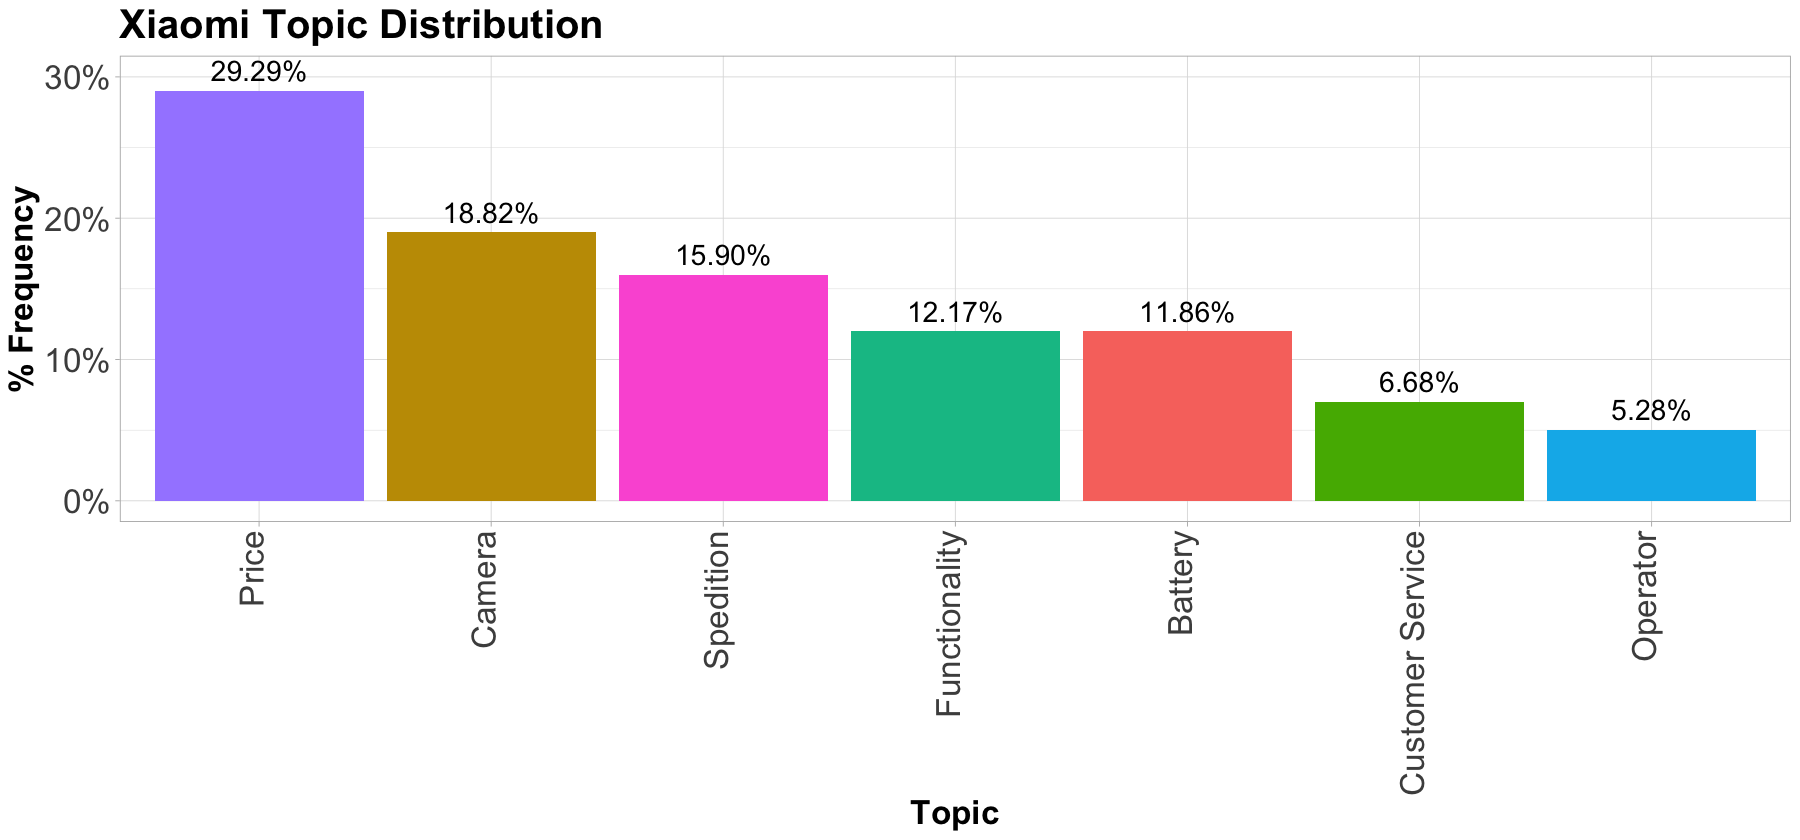

In [138]:
ggplot(n_topic_xiaomi, aes(x = reorder(dominant_topic, -freq), 
              y = round(freq,2), fill = dominant_topic,
              label = scales::percent(freq, accuracy = 0.01))) +
  geom_bar(stat = "identity")+
  theme_light()+
  geom_text(position = position_dodge(width = .9), vjust = -0.5, size = 6) +
  scale_y_continuous(labels = scales::percent, limits = c(0,0.3))+
  xlab("Topic")+ ylab("% Frequency")+
  ggtitle("Xiaomi Topic Distribution")+
  theme(legend.position = 'none', axis.text.x = element_text(angle = 90, vjust = 0.2, hjust=1), 
  axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"), 
  plot.title = element_text(size = 24, face="bold"))

Founded in 2010, Xiaomi quickly conquered the market, thanks to good hardware features accompanied by a very aggressive pricing policy.
As a matter of fact, the most discussed aspect is the price, with 29.29% of reviews. Following this topic, the 2 most discussed are the camera and the spedition, with respectivelly 18.82% and 15.90% of the reviews. The least discussed aspects are the Customer Service and the Operator, with frequencies slightly above 5%.

In [152]:
apple <- df2[df2$brand == "Apple",]

In [153]:
n_topic_apple <- apple%>%
    group_by(dominant_topic)%>%
    summarize(cnt=n())%>%
    mutate(freq = cnt/sum(cnt))

In [157]:
n_topic_apple

dominant_topic,cnt,freq
<chr>,<int>,<dbl>
Battery,357,0.10124787
Camera,151,0.04282473
Customer Service,532,0.15087918
Functionality,178,0.05048213
Operator,238,0.06749858
Price,270,0.07657402
Spedition,1800,0.51049348


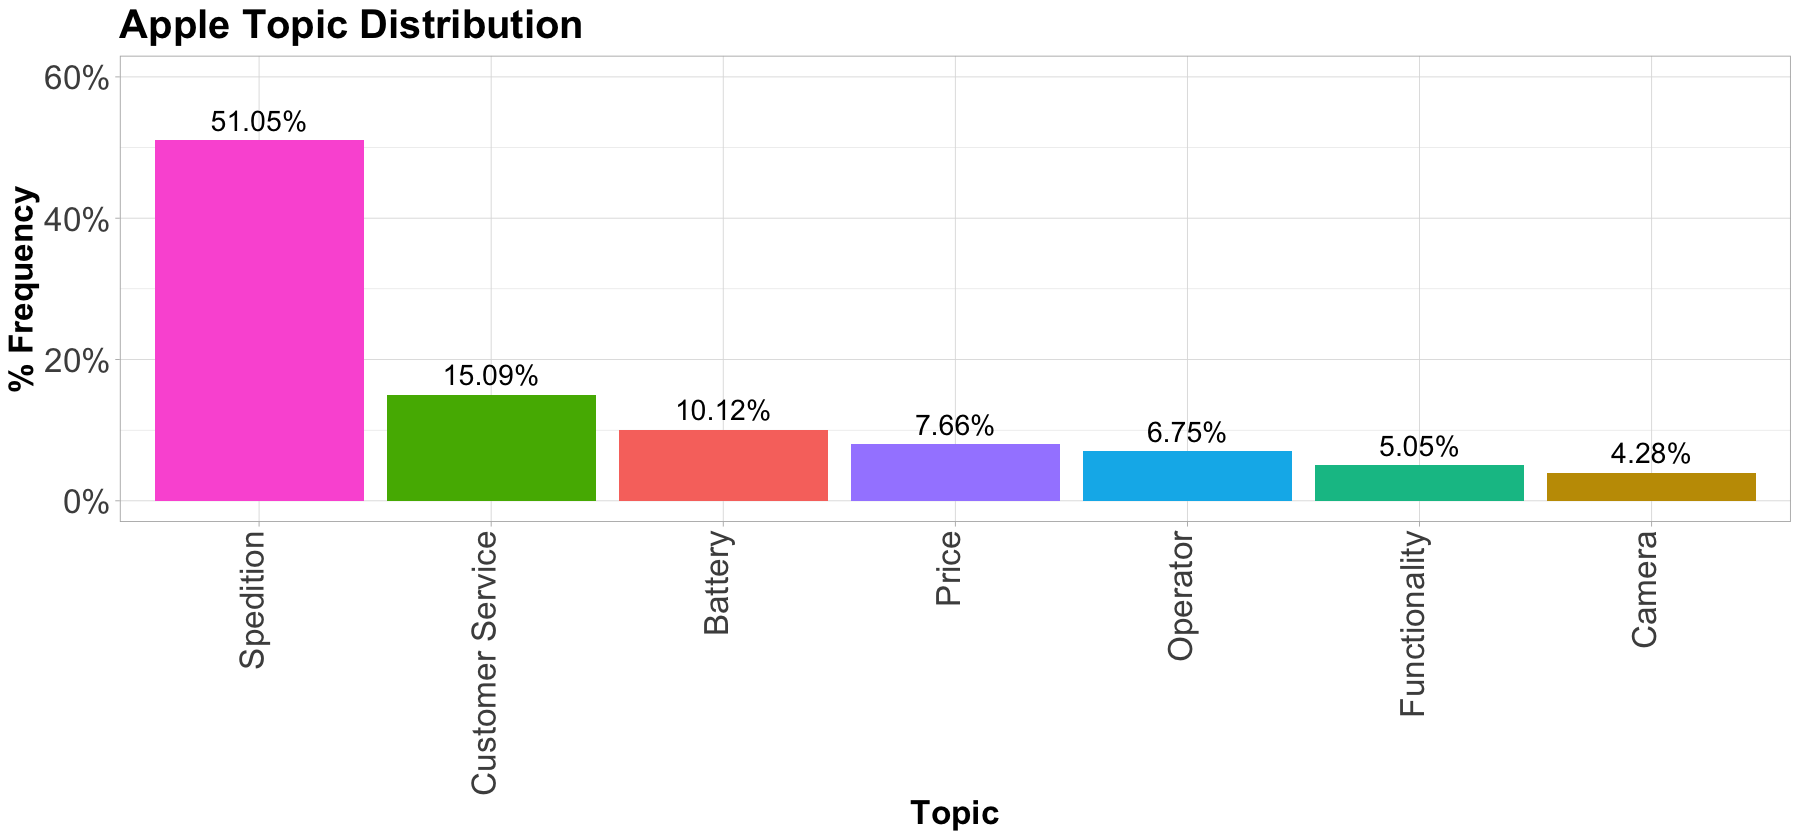

In [158]:
ggplot(n_topic_apple, aes(x = reorder(dominant_topic, -freq), 
              y = round(freq,2), fill = dominant_topic,
              label = scales::percent(freq, accuracy = 0.01))) +
  geom_bar(stat = "identity")+
  theme_light()+
  geom_text(position = position_dodge(width = .9), vjust = -0.5, size = 6) +
  scale_y_continuous(labels = scales::percent, limits = c(0,0.6))+
  xlab("Topic")+ ylab("% Frequency")+
  ggtitle("Apple Topic Distribution")+
  theme(legend.position = 'none', axis.text.x = element_text(angle = 90, vjust = 0.2, hjust=1), 
  axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"), 
  plot.title = element_text(size = 24, face="bold"))

Apple is one of the most important technology company in the word, aiming at high spending clients.

This can be seen even for the topic distribution, where the most discussed topic regard the shipping of the phone, with Spedition at 51.05% and Customer Service at 15.09%. This could be related to the fact that, since the price of Apple products is generally higher, there is a greater concern before purchase that the phone will arrive in optimal condition. Other topics, related to the characteristics of the phones, are far less discussed. The motive behind this may be the fact that Apple has a specific and known identity, and the advantages and disadvantages of the phones may be generally already known, and therefore not the subject of reviews.

#### SENTIMENT PER TOPIC

In [141]:
sentiment_xiaomi <-xiaomi %>%
  group_by(dominant_topic, s_polarity) %>%
  summarise(cnt = n()) %>%
  mutate(freq = (round(cnt / sum(cnt), 4))) %>% 
  arrange(desc(freq))

`summarise()` has grouped output by 'dominant_topic'. You can override using
the `.groups` argument.


In [150]:
sentiment_xiaomi

dominant_topic,s_polarity,cnt,freq
<chr>,<chr>,<int>,<dbl>
Price,positive,922,0.9777
Spedition,positive,471,0.9199
Battery,positive,347,0.9084
Camera,positive,550,0.9076
Operator,positive,120,0.7059
Functionality,positive,256,0.6531
Customer Service,positive,109,0.5070
Customer Service,negative,88,0.4093
Functionality,negative,111,0.2832


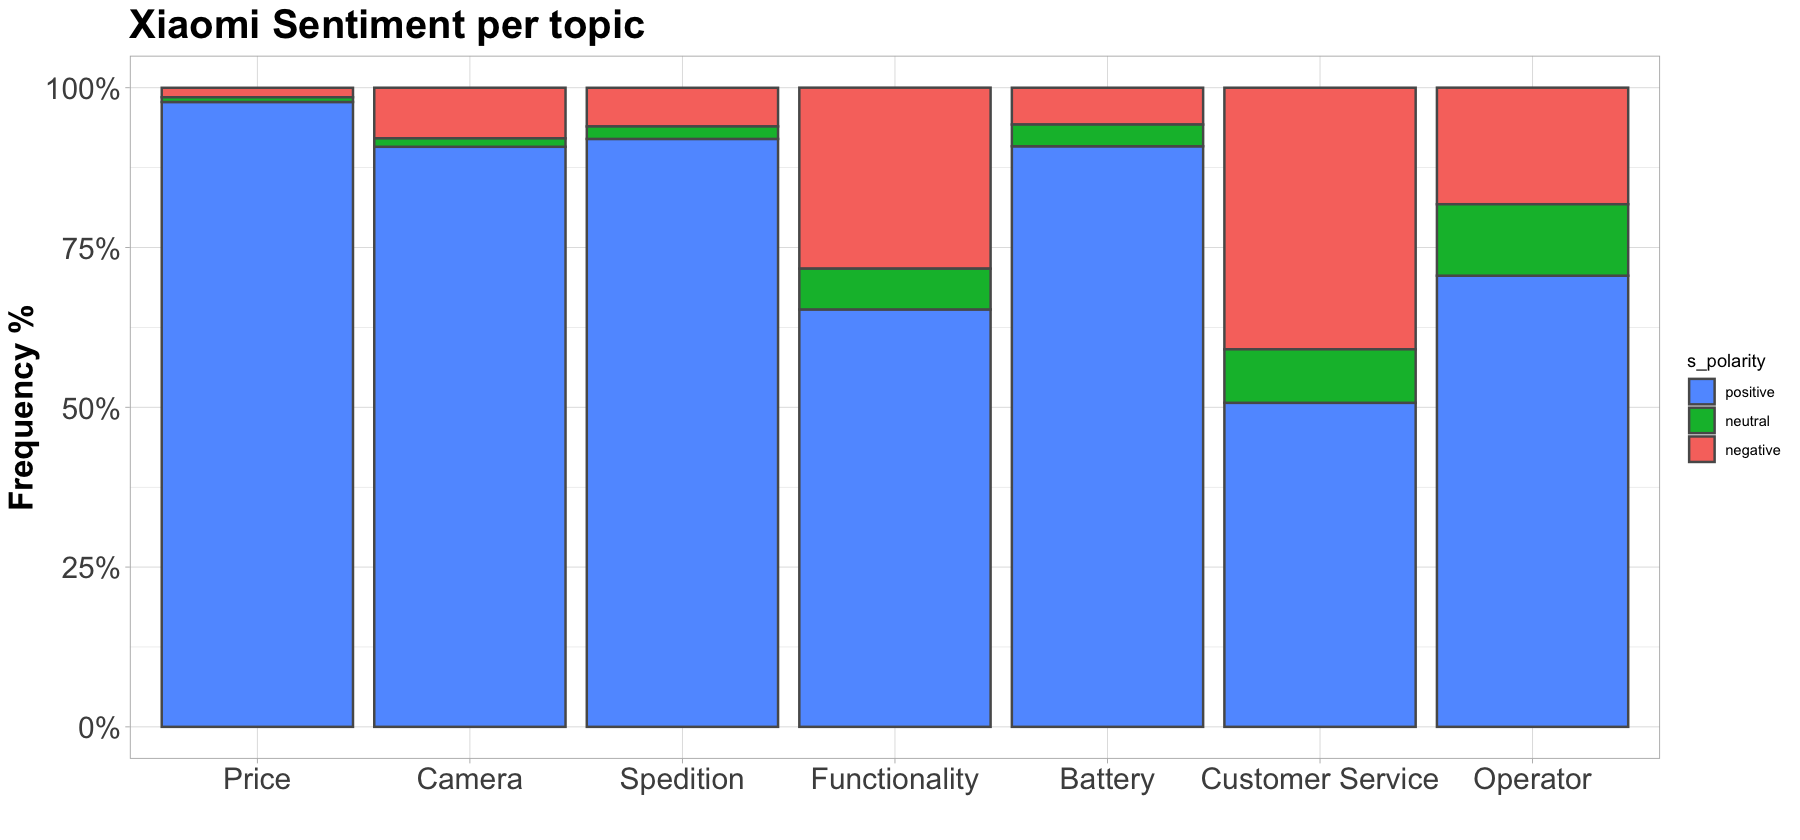

In [148]:
ggplot(data= sentiment_xiaomi,aes(x = reorder(dominant_topic, -cnt), y = freq, fill = s_polarity))+
  geom_bar(stat="identity",color="gray35", size=0.7)+
  theme_light()+
  xlab("")+
  ylab("Frequency %")+
  ggtitle("Xiaomi Sentiment per topic")+
  scale_y_continuous(labels = percent)+
  guides(fill = guide_legend(reverse = TRUE))+
  theme(axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold"), 
  plot.title = element_text(size = 24, face="bold"))

Regarding the sentiment per topic, the most positive one is, unsurprisingly, the price, with 97.77% of positive reviews. Even Camera, Spedition and Battery have really high frequency of positive reviews. Interesting to note that, except for Customer Service, the most negative topic is Functionality (28.32%), this may be explained by the fact that many user are maybe not familiar with Xiaomi phone, that rised in popularity in the recent years.

In conclusion, given this information, Xiaomi has to check what problems are given by the functionality of their phones.

In [159]:
sentiment_apple <-apple %>%
  group_by(dominant_topic, s_polarity) %>%
  summarise(cnt = n()) %>%
  mutate(freq = (round(cnt / sum(cnt), 4))) %>% 
  arrange(desc(freq))

`summarise()` has grouped output by 'dominant_topic'. You can override using
the `.groups` argument.


In [160]:
sentiment_apple

dominant_topic,s_polarity,cnt,freq
<chr>,<chr>,<int>,<dbl>
Price,positive,245,0.9074
Spedition,positive,1531,0.8506
Camera,positive,104,0.6887
Battery,positive,242,0.6779
Functionality,positive,98,0.5506
Customer Service,negative,290,0.5451
Operator,positive,114,0.4790
Functionality,negative,61,0.3427
Customer Service,positive,182,0.3421


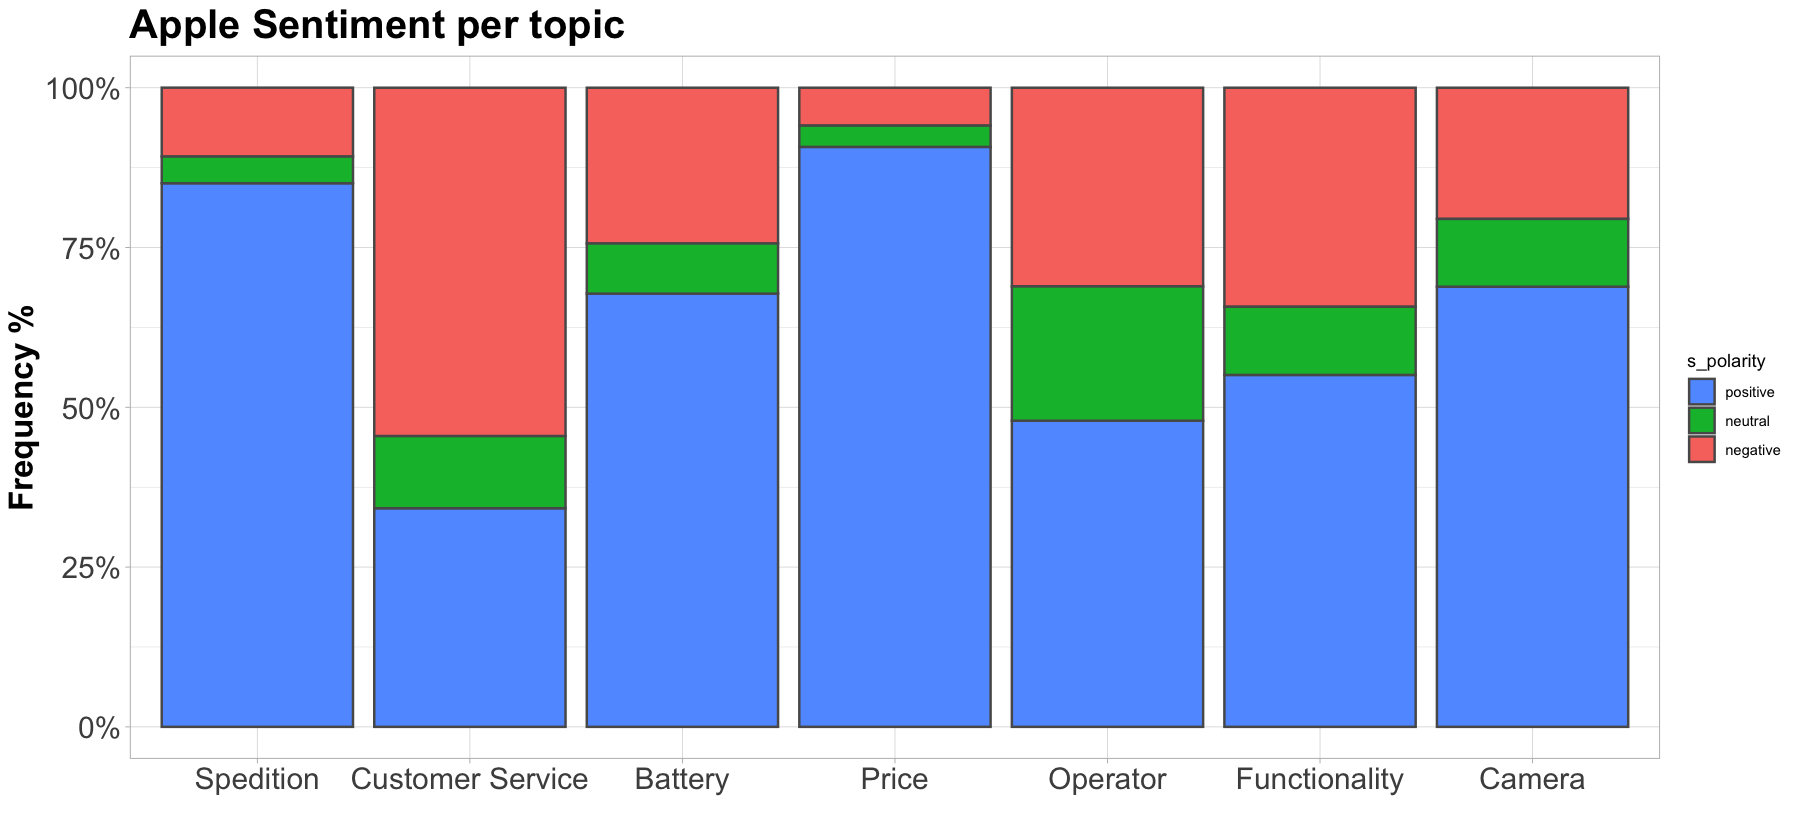

In [162]:
ggplot(data= sentiment_apple,aes(x = reorder(dominant_topic, -cnt), y = freq, fill = s_polarity))+
  geom_bar(stat="identity",color="gray35", size=0.7)+
  theme_light()+
  xlab("")+
  ylab("Frequency %")+
  ggtitle("Apple Sentiment per topic")+
  scale_y_continuous(labels = percent)+
  guides(fill = guide_legend(reverse = TRUE))+
  theme(axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold"), 
  plot.title = element_text(size = 24, face="bold"))

For Apple, the frequency of positive reviews is far less for all the topics. The most positive topic is Price, with 90.74% of positive reviews. Surprisingly, the Camera, which is one the most advertised and strong characteristics of the "IPhone", has only 68.87% of positive reviews. Probably, due to the luxury image associated with the company, the expectations created towards the purchased products were in some cases excessive, leading to dissatisfaction even in the face of normal performances. On the other hand, the most negative topics are Customer Service, with 54.51% of negative reviews, and Functionality, at 34.27%. For the first one, there may have been some problem with the shipping of the products and the refund, while for the latter one, this may be all the users that found some problems the operating system of Apple.

Given this infomation, Apple may have to check how their phone are shipped, in order to avoid the lost of customers from the dissatisfaction caused by the Amazon service.